<a href="https://colab.research.google.com/github/bibhuprasad19/Topic_Modelling_of_research_articles_AV/blob/master/healtcare_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
initial_data=pd.read_csv('/content/drive/My Drive/healthcare_vidhya/train.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
initial_data.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50


In [8]:
dictionaries=pd.read_csv('/content/drive/My Drive/healthcare_vidhya/train_data_dict.csv')

In [9]:
dictionaries  

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [10]:
initial_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
initial_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [12]:
#print(initial_data['City_Code_Patient'].value_counts())
#print(initial_data['Hospital_code'].value_counts())
#print(initial_data['Hospital_type_code'].value_counts())
print(initial_data['Age'].value_counts())
#initial_data['Bed Grade'].value_counts()
print(initial_data['Stay'].value_counts())

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64


In [13]:
import numpy as np
initial_data['City_Code_Patient'].fillna(8.0,inplace=True)
initial_data['Bed Grade'].fillna(2.0,inplace=True)

In [14]:
initial_data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
enc=OrdinalEncoder()
label=LabelEncoder()

initial_data[['Department']]= pd.DataFrame(enc.fit_transform(initial_data[['Department']]))


#initial_data['Department']= label.fit_transform(initial_data['Department'])
#initial_data['Hospital_type_code']= label.fit_transform(initial_data['Hospital_type_code'])
#initial_data['Hospital_region_code']= label.fit_transform(initial_data['Hospital_region_code'])
#initial_data['Ward_Type']= label.fit_transform(initial_data['Ward_Type'])
#initial_data['Ward_Facility_Code']= label.fit_transform(initial_data['Ward_Facility_Code'])
#initial_data['Type of Admission']= label.fit_transform(initial_data['Type of Admission'])
#initial_data['Severity of Illness']= label.fit_transform(initial_data['Severity of Illness'])


initial_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,3.0,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,3.0,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,1.0,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,3.0,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,3.0,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [16]:
initial_data[["Hospital_type_code",  "Department", "Ward_Type",
            "Ward_Facility_Code", "Type of Admission","Severity of Illness", "Age",'Available Extra Rooms in Hospital']]=enc.fit_transform(initial_data[["Hospital_type_code",  "Department", "Ward_Type", "Ward_Facility_Code", 
                                                      "Type of Admission", "Severity of Illness", "Age",'Available Extra Rooms in Hospital']])

In [17]:
initial_data['Stay']= label.fit_transform(initial_data['Stay'])
initial_data['Age']= label.fit_transform(initial_data['Age'])

In [18]:
initial_data.head(20)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2.0,3,Z,3.0,3.0,2.0,5.0,2.0,31397,7.0,0.0,0.0,2,5,4911.0,0
1,2,2,2.0,5,Z,2.0,3.0,3.0,5.0,2.0,31397,7.0,1.0,0.0,2,5,5954.0,4
2,3,10,4.0,1,X,2.0,1.0,3.0,4.0,2.0,31397,7.0,1.0,0.0,2,5,4745.0,3
3,4,26,1.0,2,Y,2.0,3.0,2.0,3.0,2.0,31397,7.0,1.0,0.0,2,5,7272.0,4
4,5,26,1.0,2,Y,2.0,3.0,3.0,3.0,2.0,31397,7.0,1.0,0.0,2,5,5558.0,4
5,6,23,0.0,6,X,2.0,1.0,3.0,5.0,2.0,31397,7.0,1.0,0.0,2,5,4449.0,1
6,7,32,5.0,9,Y,1.0,3.0,3.0,1.0,3.0,31397,7.0,0.0,0.0,2,5,6167.0,0
7,8,23,0.0,6,X,4.0,3.0,1.0,5.0,3.0,31397,7.0,1.0,0.0,2,5,5571.0,4
8,9,1,3.0,10,Y,2.0,2.0,2.0,1.0,4.0,31397,7.0,1.0,0.0,2,5,7223.0,5
9,10,10,4.0,1,X,2.0,2.0,3.0,4.0,3.0,31397,7.0,1.0,0.0,2,5,6056.0,3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


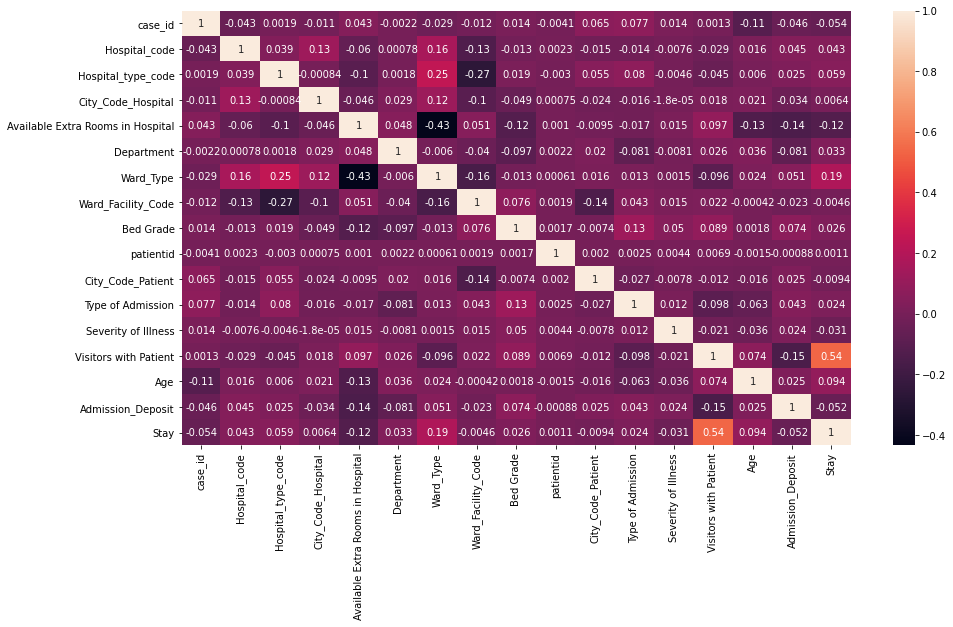

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(initial_data.corr(),annot=True)

In [20]:
rer_data=pd.DataFrame({'Hospital_code':initial_data['Hospital_code'],'Department':initial_data['Department'],
                       'Type of Admission':initial_data['Type of Admission'],
                       #'Severity of Illness':initial_data['Severity of Illness'],
                       'Age':initial_data['Age'],
                       'Visitors with Patient':initial_data['Visitors with Patient'],
                       'Ward Type':initial_data['Ward_Type'],
                       'Bed Grade':initial_data['Bed Grade'],
                       'Hospital Type Code':initial_data['Hospital_type_code'],
                       #'case id':initial_data['case_id'],
                       })
                     
#,'Ward Facility Code':initial_data['Ward_Facility_Code']

In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()

In [22]:
rer_data

,Hospital_code,Department,Type of Admission,Age,Visitors with Patient,Ward Type,Bed Grade,Hospital Type Code
0,8,3.0,0.0,5,2,2.0,2.0,2.0
1,2,3.0,1.0,5,2,3.0,2.0,2.0
2,10,1.0,1.0,5,2,3.0,2.0,4.0
3,26,3.0,1.0,5,2,2.0,2.0,1.0
4,26,3.0,1.0,5,2,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...
318433,6,3.0,0.0,4,3,1.0,4.0,0.0
318434,24,1.0,2.0,8,4,1.0,4.0,0.0
318435,7,2.0,0.0,7,3,2.0,4.0,0.0
318436,11,1.0,1.0,1,5,1.0,3.0,1.0


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(rer_data,initial_data['Stay'],test_size=0.2)

In [24]:
scaler=StandardScaler()

x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.fit_transform(x_test))



In [25]:
from sklearn.linear_model import LinearRegression,ElasticNetCV,LassoCV,RidgeCV,LogisticRegression
import xgboost 
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [26]:
from xgboost import XGBClassifier
xgb_classify=XGBClassifier(learning_rate = 0.2, n_estimators=400, max_depth=5)#,objective='multi:softmax')
xgb_classify.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
!pip install catBoost

     |████████████████████████████████| 66.1MB 52kB/s 


In [28]:
from catboost import CatBoostClassifier

catbo=CatBoostClassifier(learning_rate=0.1,iterations=50)


In [29]:
#linear_regression
lin_regressor=LogisticRegression()
lin_regressor.fit(x_train,y_train)

#decisionTree
tree_regressor=DecisionTreeClassifier(criterion= "entropy")
tree_regressor.fit(x_train,y_train)

#KNN
knn_regressor=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn_regressor.fit(x_train,y_train)

lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

gaussnb=GaussianNB()
gaussnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
y_pred_log = lin_regressor.predict(x_test)

y_pred_tree = tree_regressor.predict(x_test)
y_pred_knn = knn_regressor.predict(x_test)
y_pred_lda=lda.predict(x_test)
y_pred_gauss=gaussnb.predict(x_test)
#y_pred_catbo=catbo.predict(x_test)
y_pred_xgb=xgb_classify.predict(x_test)

In [31]:
from sklearn import metrics 

print('Root Mean Squared Error of logistc:', 100*accuracy_score(y_test, y_pred_log))


print('Root Mean Squared Error of tree:', 100*accuracy_score(y_test, y_pred_tree))
print('Root Mean Squared Error of knn:', 100*accuracy_score(y_test, y_pred_knn))
print('Root Mean Squared Error of lda:', 100*accuracy_score(y_test, y_pred_lda))
print('Root Mean Squared Error of gauss:', 100*accuracy_score(y_test, y_pred_gauss))
print('Root Mean Squared Error of xgb:', 100*accuracy_score(y_test, y_pred_xgb))

#print('Root Mean Squared Error of catbo:', 100*accuracy_score(y_test, y_pred_catbo))

Root Mean Squared Error of logistc: 37.316291923125235
Root Mean Squared Error of tree: 36.5422057530461
Root Mean Squared Error of knn: 33.9216178872001
Root Mean Squared Error of lda: 36.433865092325085
Root Mean Squared Error of gauss: 35.61424444165306
Root Mean Squared Error of xgb: 40.98103253360131


In [34]:
tester=pd.read_csv('/content/drive/My Drive/healthcare_vidhya/test.csv')

In [35]:
test_rer_data=pd.DataFrame({'Hospital_code':tester['Hospital_code'],'Department':tester['Department'],
                       'Type of Admission':tester['Type of Admission'],
                       #'Severity of Illness':tester['Severity of Illness'],
                       'Age':tester['Age'],
                       'Visitors with Patient':tester['Visitors with Patient'],
                       'Ward Type':tester['Ward_Type'],
                       'Bed Grade':tester['Bed Grade'],
                       'Hospital Type Code':tester['Hospital_type_code']})




                     


In [36]:
test_rer_data


,Hospital_code,Department,Type of Admission,Age,Visitors with Patient,Ward Type,Bed Grade,Hospital Type Code
0,21,gynecology,Emergency,71-80,2,S,2.0,c
1,29,gynecology,Trauma,71-80,4,S,2.0,a
2,26,gynecology,Emergency,71-80,3,Q,4.0,b
3,6,gynecology,Trauma,71-80,3,Q,2.0,a
4,28,gynecology,Trauma,71-80,4,R,2.0,b
...,...,...,...,...,...,...,...,...
137052,11,anesthesia,Emergency,41-50,4,Q,3.0,b
137053,25,radiotherapy,Emergency,0-10,2,R,4.0,e
137054,30,anesthesia,Urgent,0-10,2,R,4.0,c
137055,5,anesthesia,Trauma,41-50,2,R,4.0,a


In [37]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
enc=OrdinalEncoder()
label=LabelEncoder()

test_rer_data['Department']= label.fit_transform(test_rer_data['Department'])
test_rer_data['Type of Admission']= label.fit_transform(test_rer_data['Type of Admission'])
#test_rer_data['Severity of Illness']= label.fit_transform(test_rer_data['Severity of Illness'])
test_rer_data['Age']= label.fit_transform(test_rer_data['Age'])
test_rer_data['Ward Type']= label.fit_transform(test_rer_data['Ward Type'])
test_rer_data['Hospital Type Code']= label.fit_transform(test_rer_data['Hospital Type Code'])

In [38]:
test_rer_data

,Hospital_code,Department,Type of Admission,Age,Visitors with Patient,Ward Type,Bed Grade,Hospital Type Code
0,21,2,0,7,2,3,2.0,2
1,29,2,1,7,4,3,2.0,0
2,26,2,0,7,3,1,4.0,1
3,6,2,1,7,3,1,2.0,0
4,28,2,1,7,4,2,2.0,1
...,...,...,...,...,...,...,...,...
137052,11,1,0,4,4,1,3.0,1
137053,25,3,0,0,2,2,4.0,4
137054,30,1,2,0,2,2,4.0,2
137055,5,1,1,4,2,2,4.0,0


In [39]:

test_rer_data['Bed Grade'].fillna(2.0,inplace=True)
test_rer_data.isnull().sum()

Hospital_code            0
Department               0
Type of Admission        0
Age                      0
Visitors with Patient    0
Ward Type                0
Bed Grade                0
Hospital Type Code       0
dtype: int64

In [40]:
scaler=StandardScaler()

#test_rer_data=pd.DataFrame(scaler.fit_transform(test_rer_data))


test_rer_data=pd.DataFrame(scaler.fit_transform(test_rer_data))

In [41]:
test_rer_data

,0,1,2,3,4,5,6,7
0,0.307627,0.098553,-1.135402,1.521489,-0.722758,1.383073,-0.729750,0.487763
1,1.234125,0.098553,0.314484,1.521489,0.402568,1.383073,-0.729750,-0.822919
2,0.886688,0.098553,-1.135402,1.521489,-0.160095,-1.102126,1.571112,-0.167578
3,-1.429558,0.098553,0.314484,1.521489,-0.160095,-1.102126,-0.729750,-0.822919
4,1.118313,0.098553,0.314484,1.521489,0.402568,0.140473,-0.729750,-0.167578
...,...,...,...,...,...,...,...,...
137052,-0.850496,-1.680137,-1.135402,-0.065813,0.402568,-1.102126,0.420681,-0.167578
137053,0.770876,1.877243,-1.135402,-2.182215,-0.722758,0.140473,1.571112,1.798445
137054,1.349937,-1.680137,1.764369,-2.182215,-0.722758,0.140473,1.571112,0.487763
137055,-1.545370,-1.680137,0.314484,-0.065813,-0.722758,0.140473,1.571112,-0.822919


In [42]:
submit_data=pd.DataFrame(xgb_classify.predict(test_rer_data))

In [43]:
submit_data

,0
0,2
1,5
2,2
3,2
4,5
...,...
137052,2
137053,1
137054,2
137055,1


In [44]:
submit_data.replace({0: "0-10", 1: "11-20",2: "21-30",3: "31-40",
4: "41-50",
5: "51-60",
6: "61-70"
,7: "71-80"
,8: "81-90",
9: "91-100",
10:'More than 100 Days'
}, inplace=True)

In [45]:
submit_data

,0
0,21-30
1,51-60
2,21-30
3,21-30
4,51-60
...,...
137052,21-30
137053,11-20
137054,21-30
137055,11-20


In [46]:
format=pd.read_csv('/content/drive/My Drive/healthcare_vidhya/sample_submission_lfbv3c3.csv')

In [47]:
format

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [48]:
final_submit=pd.DataFrame({'case_id':tester['case_id'],'Stay':submit_data[0]})

In [49]:
final_submit['Stay'].value_counts()

21-30                 58517
11-20                 41510
51-60                 17871
31-40                 13609
More than 100 Days     1928
0-10                   1903
81-90                  1183
71-80                   392
91-100                  100
41-50                    32
61-70                    12
Name: Stay, dtype: int64

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [50]:
final_submit.to_csv('healthcare.csv',index=False)